# REDDITAPP FOR TRENDING DATA

PRAW, an acronym for "Python Reddit API Wrapper", is a Python package that allows for simple access to Reddit's API. PRAW aims to be easy to use and internally follows all of Reddit's API rules. With PRAW there's no need to introduce sleep calls in your code. Give your client an appropriate user agent and you're set.

In [2]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


# AUTHENTICATION

In this code, We creating a connection to Reddit's API using our application's credentials (client ID and client secret),
and we will be able to make requests to Reddit's API through the reddit object using methods provided by the praw library.

In [3]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="w1WNTzGA-SPpQ9zTarrOPw",
    client_secret="pglspzrDq-5pPmESKMGiHgw-uBsmHg",
    user_agent=user_agent
)

 ## IMPORTING NECESSARY PACKAGES

In [4]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

C:\Users\laxmi\AppData\Local\Temp\ipykernel_15240\3422756113.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## GET TRENDING TOPIC FROM YOUR SUBREDDIT

The **"neuralink"** subreddit channel will be use for this project

In [5]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Neuralink").rising(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

The first Neuralink patient is doing well, and Elon Musk is hopeful to have results by later this week.
1aj3txm
occupyOneillrings
1707094645.0
20
1.0
https://twitter.com/cb_doge/status/1754234334037643564
0


## HOT TOPICS ABOUT NEURALINK

In [6]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Neuralink").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

r/Neuralink General Discussion Thread — August 01 – August 30
wdgwb6
AutoModerator
1659358810.0
31
0.92
https://www.reddit.com/r/Neuralink/comments/wdgwb6/rneuralink_general_discussion_thread_august_01/
0


## NEW TOPIC FROM SUBREDDIT OF NEURALINK

In [7]:
# new  topics

headlines = set()
for submission in reddit.subreddit("Neuralink").new(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

The first Neuralink patient is doing well, and Elon Musk is hopeful to have results by later this week.
1aj3txm
occupyOneillrings
1707094645.0
20
1.0
https://twitter.com/cb_doge/status/1754234334037643564
0


**GET TOTAL COMMENT IN SUBREDDIT**

This code helps us retrieve the titles of submissions currently listed under hot section of bitcoin subreddit and prints number of unique headlines

In [8]:
headlines = set()
for submission in reddit.subreddit("Neuralink").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

675


## CREATING A DATAFRAME

In [9]:
#Create a dataframe from the scrapped data 
neuralink_df = pd.DataFrame(headlines)
neuralink_df.head()

,0
0,haha
1,I don’t want this technology to come to fruiti...
2,What are some Neuralink rivals or competition?
3,Isn't there the danger of Neuralink turning in...
4,New Neuralink Paper - An Integrated Brain-Mach...


## NEURALINK DATA EXCLUDING FIRST COLUMN

In [10]:
df = neuralink_df.iloc[:, 1:]
neuralink_df.head()

,0
0,haha
1,I don’t want this technology to come to fruiti...
2,What are some Neuralink rivals or competition?
3,Isn't there the danger of Neuralink turning in...
4,New Neuralink Paper - An Integrated Brain-Mach...


### COLUMNS

In [11]:
neuralink_df.columns

RangeIndex(start=0, stop=1, step=1)

In [12]:
neuralink_df.columns = ['Titles']

### HEAD

In [13]:
neuralink_df.head()

,Titles
0,haha
1,I don’t want this technology to come to fruiti...
2,What are some Neuralink rivals or competition?
3,Isn't there the danger of Neuralink turning in...
4,New Neuralink Paper - An Integrated Brain-Mach...


### COUNTING DUPLICATED TITLES

we are trying to find any duplicated titles in dataframe

In [14]:
neuralink_df.Titles.duplicated().sum() 

0

## CLEANING THE DATA

"Cleantxt" function is used to clean the text from hashtags,retweet indicators,hyperlinks and colons and display clean text

In [15]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
neuralink_df["Titles"]= neuralink_df["Titles"].apply(cleanTxt)

#Show the clean text
neuralink_df.head()

,Titles
0,haha
1,I don’t want this technology to come to fruiti...
2,What are some Neuralink rivals or competition?
3,Isn't there the danger of Neuralink turning in...
4,New Neuralink Paper - An Integrated Brain-Mach...


## REMOVING EMOJIS

"remove_emoji" is used to remove emojis from a given string using regular expression pattern

In [16]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
neuralink_df["Titles"]= neuralink_df["Titles"].apply(remove_emoji)

#Show the clean text
neuralink_df.head()

,Titles
0,haha
1,I don’t want this technology to come to fruiti...
2,What are some Neuralink rivals or competition?
3,Isn't there the danger of Neuralink turning in...
4,New Neuralink Paper - An Integrated Brain-Mach...


## TEXTBLOB

Textblob is a python package used for performing various natural language processing tasks like sentiment analysis, text classification,spell checking

In [17]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


## IMPORTING WORDCLOUD STOPWORDS AND TEXTBLOB

In [18]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

## SUBJECTIVITY AND POLARITY

Subjectivity refers to the degree to which a statement or text expresses 
personal opinions, emotions, or feelings rather than objective facts.

 Polarity refers to the sentiment expressed in a piece of text, indicating whether the text 
conveys a positive, negative, or neutral opinion or emotion.

In [19]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df datafram
neuralink_df['Subjectivity'] = neuralink_df['Titles'].apply(getSubjectivity)
neuralink_df['Polarity'] = neuralink_df['Titles'].apply(getPolarity)

#Now display data
neuralink_df.head()

,Titles,Subjectivity,Polarity
0,haha,0.300000,0.200000
1,I don’t want this technology to come to fruiti...,0.000000,0.000000
2,What are some Neuralink rivals or competition?,0.000000,0.000000
3,Isn't there the danger of Neuralink turning in...,0.400000,0.200000
4,New Neuralink Paper - An Integrated Brain-Mach...,0.454545,0.136364


## GROUPING

In [20]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
neuralink_df["Insight"] = neuralink_df["Polarity"].apply(getInsight)

neuralink_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,haha,0.300000,0.200000,Positive
1,I don’t want this technology to come to fruiti...,0.000000,0.000000,Neutral
2,What are some Neuralink rivals or competition?,0.000000,0.000000,Neutral
3,Isn't there the danger of Neuralink turning in...,0.400000,0.200000,Positive
4,New Neuralink Paper - An Integrated Brain-Mach...,0.454545,0.136364,Positive
5,Text Version of Last Year's Presentation (E-Book),0.066667,0.000000,Neutral
6,Staying realistic on timelines,0.333333,0.166667,Positive
7,Animal Care at Neuralink,0.000000,0.000000,Neutral
8,"""We're excited to see progress being made o...",0.401136,0.161364,Positive
9,Neuralink got me extremely excited and hopeful...,0.437500,0.187500,Positive


# Data Visualization

In [21]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## SENTIMENT SCORE

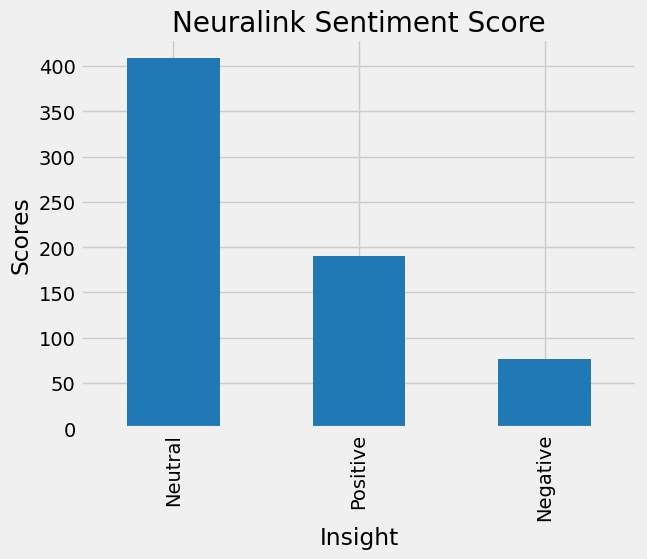

In [22]:
#Plot the values count of sentiment
plt.title("Neuralink Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
neuralink_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# WORDCLOUDS


WordCloud is a visualization technique used to represent text data, where the size of each word corresponds to its frequency or importance in the text. It creates a visual representation of the most common words in the text by generating a cloud-like arrangement of words, where frequently occurring words are displayed larger and centrally positioned.

## MASK WORDCLOUD

In the below code we try to mask the wordcloud into a image where I considered brain as my image and tried to build a wordcloud.
Here numpy library is used to import image and mask it.

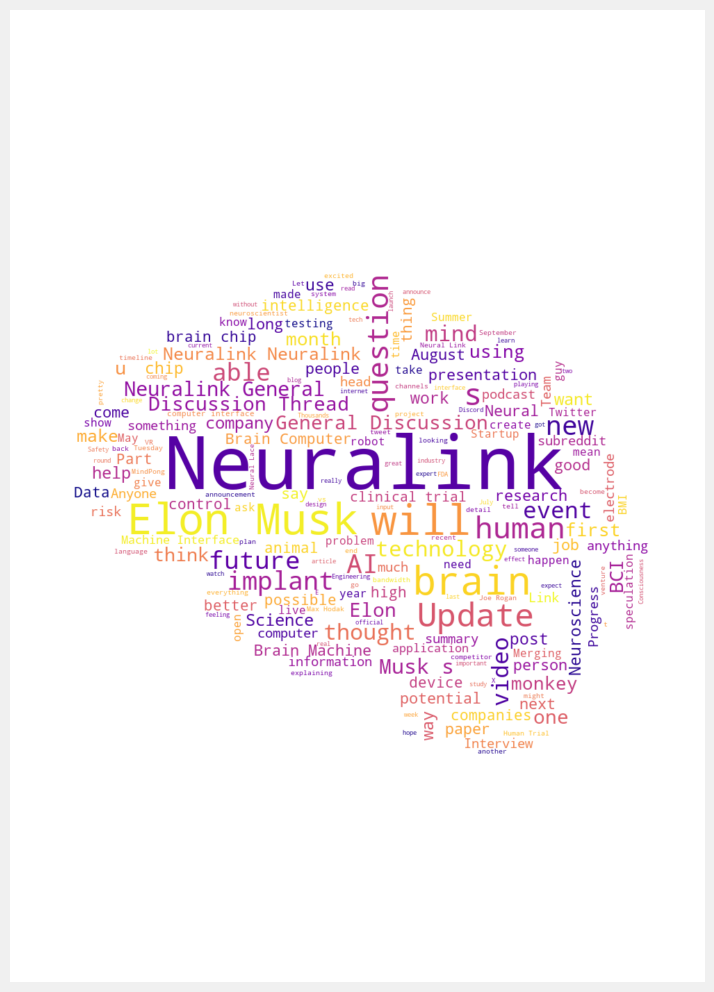

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# here we load the image  to mask
mask = np.array(Image.open("brain-7.jpg"))  # Provide the path to our image mask

# To join all tweet titles
text = ' '.join([twts for twts in neuralink_df['Titles']])

wordcloud = WordCloud(width=1200, height=800,
                      max_words=200,
                      stopwords=STOPWORDS,
                      background_color="white",
                      colormap='plasma', 
                      mask=mask).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## WORDCLOUDS USING COLORMAP

In the below code we try to construct a wordcloud using colormap function provided by matplotlib,we can choose a vaired range of color options from which magma is selected and backcolor is considered as black and set a desired size for font.

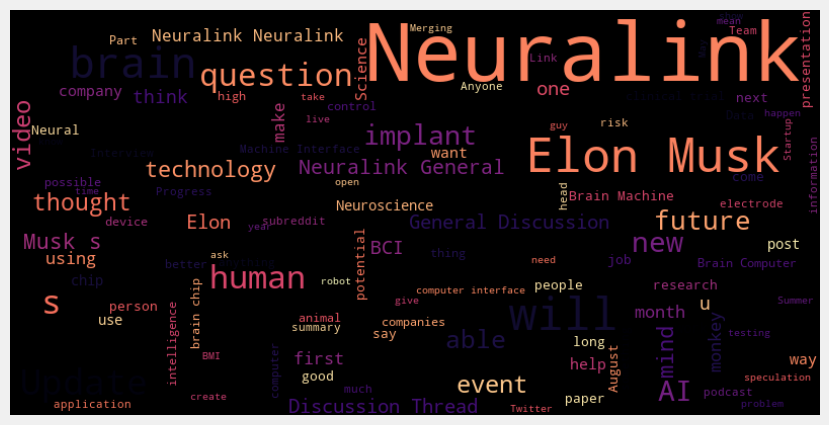

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = ' '.join([twts for twts in neuralink_df['Titles']])

wordcloud = WordCloud(width=800, height=400,
                      max_words=150,stopwords=STOPWORDS,background_color="black",colormap='magma', contour_color="white",
                      contour_width=3,min_font_size=10, max_font_size=80, random_state=42).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## WORDCLOUD WITH RANDOMNESS

In the below wordclod we used colormap="cividis", put contourcolor gray  and with a increased random state 

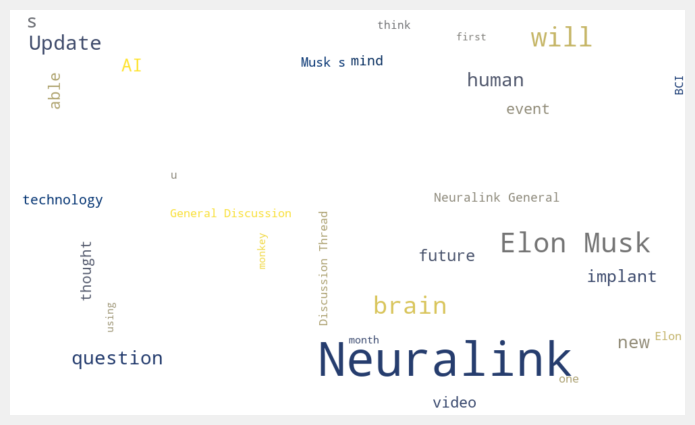

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = ' '.join([twts for twts in neuralink_df['Titles']])


wordcloud = WordCloud(width=1000, height=600,
                      max_words=200,stopwords=STOPWORDS,
                      background_color="white",colormap='cividis',
                      contour_color="gray",contour_width=2, min_font_size=15,
                      max_font_size=70, random_state=60).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## WORDCLOUD WITH PASTEL COLORING

In the below wordcloud pastel color theme is used with a white background to maintain uniform view

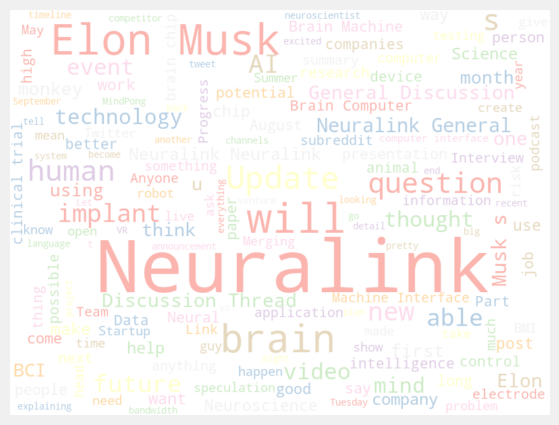

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
text = ' '.join([twts for twts in neuralink_df['Titles']])
wordcloud = WordCloud(width=800, height=600,
                      max_words=150,
                      stopwords=STOPWORDS,
                      background_color="white",
                      colormap='Pastel1',contour_color="black", contour_width=2,
                      mask=None, random_state=42).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
